In [43]:
import matplotlib.pyplot as plt
from PIL import Image
from tifffile import imread
import numpy as np

from os import getcwd
CWD = getcwd()
FIG_DATA = '/'.join(CWD.split('/')[:-1] + ['fig_data'])
print(FIG_DATA)

/home/ronan/Documents/uni_work/phd/hr_dv2/notebooks/fig_data


In [48]:
def tiff_to_labels(tiff: np.ndarray, rev: bool=False) -> np.ndarray:
    out = tiff
    vals = np.unique(tiff)[::-1] if rev else np.unique(tiff)
    for i, val in enumerate(vals):
        out = np.where(tiff == val, i, out)
    return out

In [49]:
cmap = [
            "#fafafa",
            "#1f77b4",
            "#ff7f0e",
            "#2ca02c",
            "#d62728",
        ]

In [53]:
cell = imread(f'{FIG_DATA}/cell.tif')
labels = Image.open(f'{FIG_DATA}/labels.png')
gt = tiff_to_labels(imread(f'{FIG_DATA}/mask.tif'), True)

dv2_seg = tiff_to_labels(imread(f'{FIG_DATA}/dinov2_seg.tiff'))
rf_seg = tiff_to_labels(imread(f'{FIG_DATA}/rf_seg.tiff'))

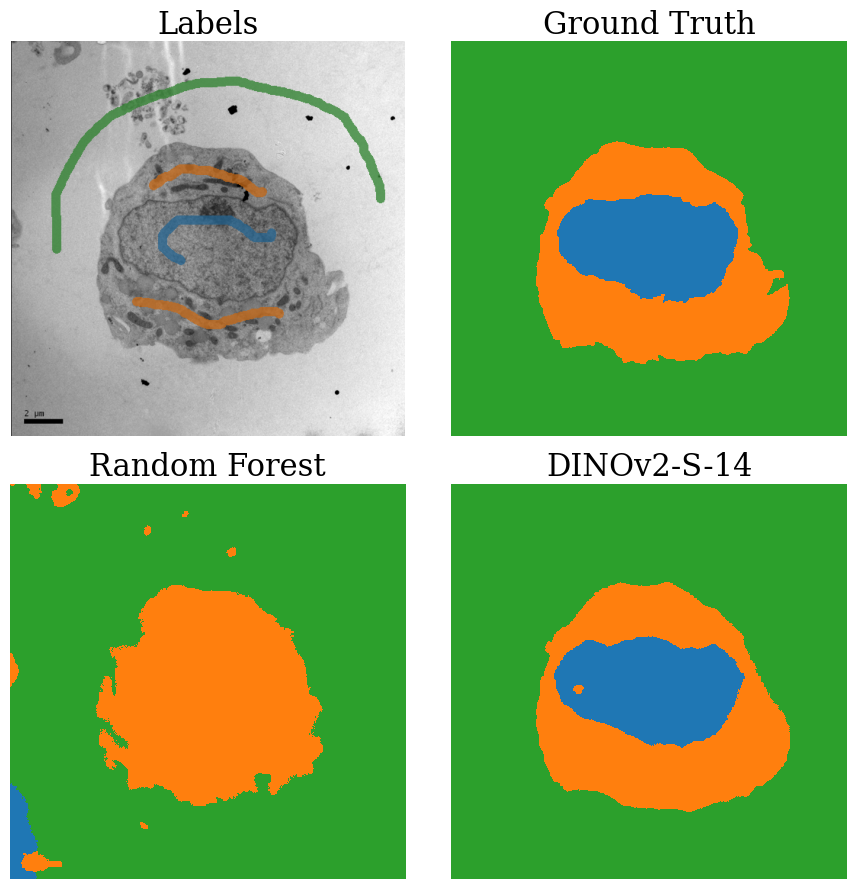

In [62]:
fig, axs = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(9, 9)
plt.rcParams["font.family"] = "serif"

axs[0, 0].imshow(labels)
axs[0, 0].set_title('Labels', fontsize=22)
axs[0, 1].imshow(gt, cmap='tab10', interpolation='nearest', vmin=0, vmax=10)
axs[0, 1].set_title('Ground Truth', fontsize=22)
axs[1, 0].imshow(rf_seg, cmap='tab10', interpolation='nearest', vmin=0, vmax=10)
axs[1, 0].set_title('Random Forest', fontsize=22)
axs[1, 1].imshow(dv2_seg, cmap='tab10', interpolation='nearest', vmin=0, vmax=10)
axs[1, 1].set_title('DINOv2-S-14', fontsize=22)

for row in axs:
    for col in row:
        col.set_axis_off()

plt.tight_layout()